In [5]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from scipy.special import kv, gamma
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

In [6]:
# 1. 生成空间点
n = 50
spacing = 0.2
u = np.tile(np.arange(n) * spacing, n)
v = np.repeat(np.arange(n) * spacing, n)
coords = np.column_stack([u, v])

# 2. 生成协变量
np.random.seed(42)
x1 = np.random.uniform(0, 1, n*n)

# 3. 生成空间相关的x2（高斯过程）
def matern_covariance(coords, sigma2=1, nu=1, rho=0.1):
    dists = cdist(coords, coords)
    part1 = (2**(1-nu)) / gamma(nu)
    part2 = (np.sqrt(2*nu) * dists / rho)**nu
    part3 = kv(nu, np.sqrt(2*nu) * dists / rho)
    part3[np.isnan(part3)] = 1  # kv(0,0)=1
    cov = sigma2 * part1 * part2 * part3
    cov[dists == 0] = sigma2
    return cov

sigma2 = 1
nu = 1
rho = np.random.uniform(0.05, 0.3)
cov_x2 = matern_covariance(coords, sigma2, nu, rho)
x2 = np.random.multivariate_normal(np.zeros(n*n), cov_x2)

# 4. 生成beta0, beta1
def beta0(u, v):
    return 5 * np.sin(np.pi/5 * (5-u)) * (5-u)/25

def beta1(u, v):
    return 1/25 * (25 - (5-u)**2) * (25 - (5-v)**2)

beta0_vals = beta0(u, v)
beta1_vals = beta1(u, v)

# 5. 生成噪声
epsilon = np.random.normal(0, 1, n*n)

# 6. 生成y
y = beta0_vals + beta1_vals * x1 + x2 + epsilon

In [7]:
# 7. 保存为CSV
df = pd.DataFrame({
    'id': np.arange(1, n*n+1),
    'u': u,
    'v': v,
    'x1': x1,
    'x2': x2,
    'epsilon': epsilon,
    'y': y
})



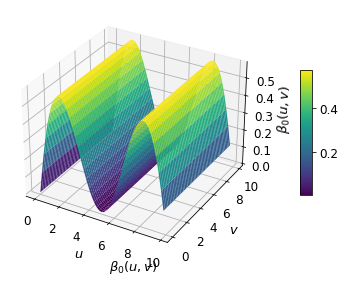

In [8]:
#画 $\beta_0(u,v)$ '$\beta_1(u,v)
U = u.reshape(n, n)
V = v.reshape(n, n)
B0 = beta0(U, V)
B1 = beta1(U, V)

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
surf1 = ax1.plot_surface(U, V, B0, cmap='viridis')
ax1.set_xlabel('$u$', fontsize=13)
ax1.set_ylabel('$v$', fontsize=13)
ax1.set_zlabel(r'$\beta_0(u,v)$', fontsize=13)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='z', which='major', labelsize=12)
cb1 = fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10, pad=0.1)
cb1.ax.tick_params(labelsize=12)
ax1.set_title(r'$\beta_0(u,v)$', y=-0.08, fontsize=13)
plt.tight_layout()
plt.show()


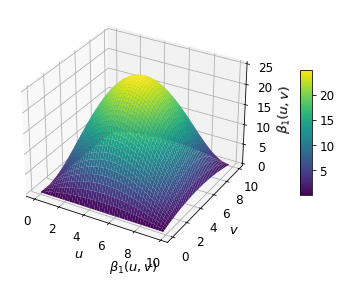

In [9]:
fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
surf2 = ax2.plot_surface(U, V, B1, cmap='viridis')
ax2.set_xlabel('$u$', fontsize=13)
ax2.set_ylabel('$v$', fontsize=13)
ax2.set_zlabel(r'$\beta_1(u,v)$', fontsize=13,)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='z', which='major', labelsize=12)
cb2 = fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10, pad=0.1)
cb2.ax.tick_params(labelsize=12)
ax2.set_title(r'$\beta_1(u,v)$', y=-0.08, fontsize=13)
plt.tight_layout()
plt.show()

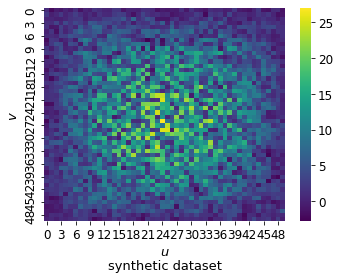

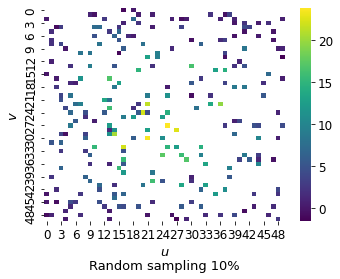

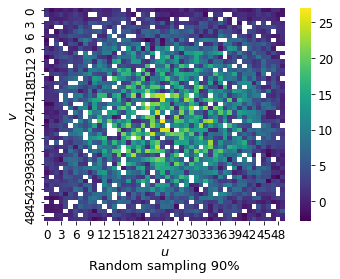

In [10]:
import seaborn as sns

Y = y.reshape(n, n)
plt.figure(figsize=(5, 4))
hm1 = sns.heatmap(Y, cmap='viridis', cbar=True)
hm1.set_xlabel('$u$', fontsize=13)
hm1.set_ylabel('$v$', fontsize=13)
hm1.set_xticklabels(hm1.get_xticklabels(), fontsize=12)
hm1.set_yticklabels(hm1.get_yticklabels(), fontsize=12)
cbar = hm1.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
hm1.set_title('synthetic dataset',y=-0.25, fontsize=13)
plt.tight_layout()
plt.show()

# 10%sample
plt.figure(figsize=(5, 4))
idx_10 = np.random.choice(n*n, int(0.1*n*n), replace=False)
Y_10 = np.full_like(y, np.nan)
Y_10[idx_10] = y[idx_10]
hm2 = sns.heatmap(Y_10.reshape(n, n), cmap='viridis', cbar=True)
hm2.set_xlabel('$u$', fontsize=13)
hm2.set_ylabel('$v$', fontsize=13)
hm2.set_xticklabels(hm2.get_xticklabels(), fontsize=12)
hm2.set_yticklabels(hm2.get_yticklabels(), fontsize=12)
cbar = hm2.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
hm2.set_title('Random sampling 10%',y=-0.25, fontsize=13)
plt.tight_layout()
plt.show()

# 90% sample
plt.figure(figsize=(5, 4))
idx_90 = np.setdiff1d(np.arange(n*n), idx_10)
Y_90 = np.full_like(y, np.nan)
Y_90[idx_90] = y[idx_90]
hm3 = sns.heatmap(Y_90.reshape(n, n), cmap='viridis', cbar=True)
hm3.set_xlabel('$u$', fontsize=13)
hm3.set_ylabel('$v$', fontsize=13)
hm3.set_xticklabels(hm3.get_xticklabels(), fontsize=12)
hm3.set_yticklabels(hm3.get_yticklabels(), fontsize=12)
cbar = hm3.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
hm3.set_title('Random sampling 90%',y=-0.25, fontsize=13)
plt.tight_layout()
plt.show()
